In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, boxcox

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

import re

#Warning 
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('./dataset/df_new.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
df_line = df[df['origin'] == 1].reset_index(drop = True)
#df_line['horsepower'].values
df_line.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [5]:
df_line_train = df_line[0:int(235*0.8)]
df_line_test = df_line[int(235*0.8):-1]
df_line.shape, df_line_train.shape, df_line_test.shape

((236, 9), (188, 9), (47, 9))

In [15]:
# Final version
# X_train shape: n x d+1, n rows and d+1 columns
# Y_train shape: n x 1, n rows and 1 column
# theta shape: d+1 x 1, d+1 rows and 1 column
# n: number of data
# d: number of parameters(weigth and bias)
# model, fit, predictions, metrics
# X and Y has to be vertical vectors


def fit_linear(theta, X, Y, batch_size, update_parameters, tolerance, lr = 0.01, epochs = 100):
    n, d = X.shape
    #print(X.shape)
    model = []
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        #print(indices)
        X = X[indices]
        Y = Y[indices]
        for i in range(0, n, batch_size):
            #print(i)
            X_batch = X[i:i+batch_size]
            Y_batch = Y[i:i+batch_size]
            #print(theta)
            theta = update_parameters(theta, X_batch, Y_batch, lr)
            
        #print("Theta: ",theta)
        model.append(theta)
        #model.append({'weight': theta[0], 'bias':theta[1], 'epoch':epoch})
        #print(model)
        # Tolerance
        grad = np.dot(X.T,Y - np.dot(X,theta))/n
        if np.linalg.norm(grad) < tolerance:
            return model
            break
    return model

def gradient(theta, X, Y, lr):
    n,_ = X.shape
    #print((lr/n)*np.dot(X.T,Y - np.dot(X,theta)))
    theta = theta - (lr/n)*np.dot(X.T,Y - np.dot(X,theta))
    #print("Theta temp:", theta)
    return theta

def closed_solution(X, Y):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    return theta
    
def prediction(theta, X):
    Y_pred = np.dot(X, theta)
    return Y_pred

# Measure Error during Epochs:
def AbsoluteError(Y, X, theta):
    Y_pred = np.dot(X, theta)
    return np.abs(Y - Y_pred)

def SquareError(Y, X, theta):
    Y_pred = np.dot(X, theta)
    return np.abs(np.dot((Y - Y_pred).T, (Y - Y_pred)))

def metrics(model, Y, X):
    """
    X: Dataset for test
    """
    error_MAE = []
    error_RMSE = []
    
    epoch = [epoch for epoch in range(len(model))]

    for w in range(len(model)):
        theta = model[w]        
        error_MAE.append(np.take(AbsoluteError(Y, X, theta),0))
        error_RMSE.append(np.take(SquareError(Y, X, theta),0))
    
    MAE = np.sum(error_MAE)/len(X[0])
    RMSE = np.sqrt(np.sum(error_RMSE)/(2*len(X[0])))
    #print(error_RMSE)
    #plt.plot(epoch, error_MAE)
    plt.plot(epoch, error_RMSE)
    plt.title('Epoch' + ' vs ' + 'Error_RMSE', fontsize = 15)
    plt.show()

In [16]:
X_train = np.array([df_line_train['horsepower'].values, np.ones(188)]).T
Y_train = np.array([df_line_train['mpg'].values]).T
#theta = np.array([np.random.randint(35,40, 2)]).T
theta = np.array([[1],[0]])
lr = 0.00005
batch_size = 1
tolerance = 0.00001
print("Shape of X_train:{}, Shape of Y_train:{}, Shape of Theta:{}".format(X_train.shape, Y_train.shape, theta.shape))

Shape of X_train:(188, 2), Shape of Y_train:(188, 1), Shape of Theta:(2, 1)


In [17]:
model = fit_linear(theta, X_train, Y_train, batch_size, gradient, tolerance, lr, epochs = 10)

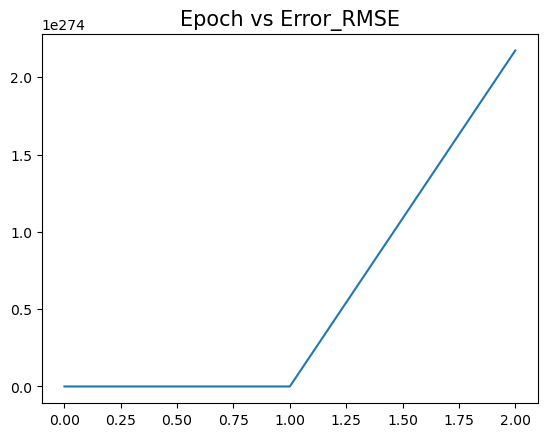

In [18]:
metrics(model, Y_train, X_train)

In [19]:
Y_pred = prediction(theta, X_train)
Y_pred.shape

(188, 1)

In [20]:
closed_solution(X_train, Y_train)
#np.dot(X_train, X_train.T).shape
#np.linalg.det(np.dot(X_train, X_train.T))
#np.linalg.inv(np.dot(X_train, X_train.T))
np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), Y_train)

array([[-0.10882299],
       [31.51334944]])

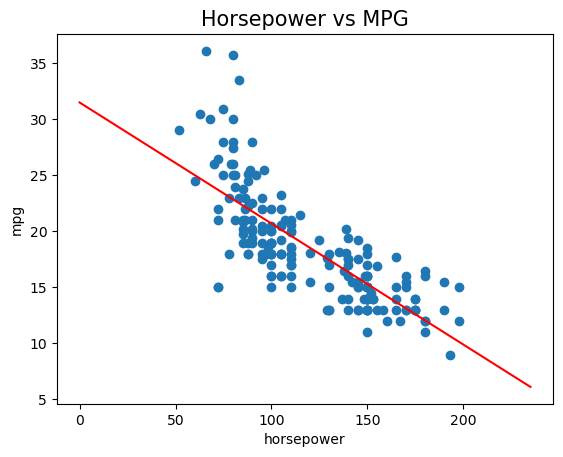

In [22]:
# Here the best parameter which best fit data:
plt.scatter(df_line_train['horsepower'], df_line_train['mpg'])
x = [float(i) for i in range(236)]
#for w in range(0,len(model_lr)):
for w in range(183, 184):
#for w in np.random.randint(0,len(df_line_train), 6):
    y_pred = [31.5 - 0.108*i for i in x]
    plt.plot(x, y_pred, color='red')
plt.title('Horsepower' + ' vs ' + 'MPG', fontsize = 15)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()
plt.show()